# Regression on TF using basic method

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [21]:
noise = np.random.randn(len(x_data))

In [22]:
y_true = (0.5*x_data)+5+noise 

In [23]:
x_df = pd.DataFrame(x_data, columns = ['X_data'])

In [24]:
y_df = pd.DataFrame(y_true, columns = ['Y_true']) 

In [25]:
my_data = pd.concat([x_df, y_df], axis = 1 )

In [26]:
my_data.head()

,X_data,Y_true
0,0.00000,3.732238
1,0.00001,4.592941
2,0.00002,4.398350
3,0.00003,5.013716
4,0.00004,2.473573


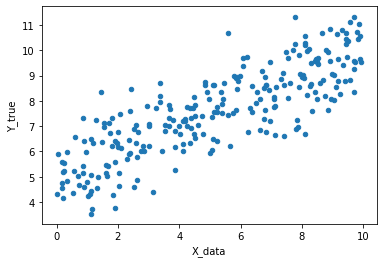

In [27]:
my_data.sample(n=250).plot(kind='scatter', x = 'X_data', y = 'Y_true')

In [29]:
batch_size = 8 

In [31]:
np.random.randn(2)

array([0.19868301, 0.98063285])

In [32]:
m = tf.Variable(0.19)
b = tf.Variable(0.98)

In [33]:
xph = tf.placeholder(tf.float32, [batch_size])

In [35]:
yph = tf.placeholder(tf.float32, [batch_size])

In [37]:
y_model = m * xph + b

In [38]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [41]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [42]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        randind = np.random.randint(len(x_data), size = batch_size)
        feed = {xph: x_data[randind], yph: y_true[randind]}
        sess.run(train, feed)
    model_m, model_b = sess.run([m,b])

In [46]:
model_m

0.54241985

In [47]:
model_b

4.907365

In [48]:
y_hat = model_m*x_data + model_b

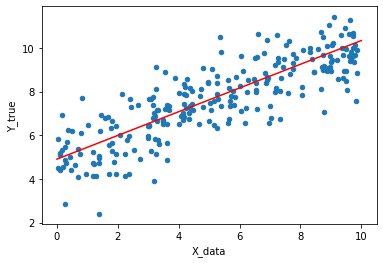

In [49]:
my_data.sample(250).plot(kind='scatter', x='X_data', y='Y_true')
plt.plot(x_data, y_hat, 'r')

# Regression in TF using tf.estimator()

In [73]:
feat_cols = [ tf.feature_column.numeric_column('x', shape=[1]) ]

In [74]:
estimator = tf.estimator.LinearRegressor(feat_cols)

W0904 11:58:41.064237 140100123854656 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpy2drsp93


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size = 0.3, random_state = 101)

In [77]:
X_train.shape

(700000,)

In [78]:
y_train.shape

(700000,)

In [79]:
y_test.shape

(300000,)

In [80]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size = 8, num_epochs=None, shuffle = True)

In [81]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_train}, y_train, batch_size = 8, num_epochs=1000, shuffle = False)

In [82]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':X_test}, y_test, batch_size = 8, num_epochs=1000, shuffle = False)

In [86]:
estimator.train(input_fn=input_func, steps = 1000)

In [87]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

In [88]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps = 1000)

In [89]:
test_metrics

{'average_loss': 0.99357694,
 'label/mean': 7.4832363,
 'loss': 7.9486156,
 'prediction/mean': 7.4900713,
 'global_step': 3100}

In [90]:
train_metrics

{'average_loss': 1.0211813,
 'label/mean': 7.494855,
 'loss': 8.169451,
 'prediction/mean': 7.508407,
 'global_step': 3100}

In [91]:
new = np.linspace(0,10,10)
input_fn_pred = tf.estimator.inputs.numpy_input_fn({'x':new}, shuffle = False)

In [93]:
list(estimator.predict(input_fn=input_fn_pred))

[{'predictions': array([4.969416], dtype=float32)},
 {'predictions': array([5.5333824], dtype=float32)},
 {'predictions': array([6.097349], dtype=float32)},
 {'predictions': array([6.661315], dtype=float32)},
 {'predictions': array([7.2252817], dtype=float32)},
 {'predictions': array([7.7892475], dtype=float32)},
 {'predictions': array([8.353214], dtype=float32)},
 {'predictions': array([8.917181], dtype=float32)},
 {'predictions': array([9.481148], dtype=float32)},
 {'predictions': array([10.045114], dtype=float32)}]

In [94]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_pred):
    predictions.append(pred['predictions'])

In [95]:
predictions

[array([4.969416], dtype=float32),
 array([5.5333824], dtype=float32),
 array([6.097349], dtype=float32),
 array([6.661315], dtype=float32),
 array([7.2252817], dtype=float32),
 array([7.7892475], dtype=float32),
 array([8.353214], dtype=float32),
 array([8.917181], dtype=float32),
 array([9.481148], dtype=float32),
 array([10.045114], dtype=float32)]

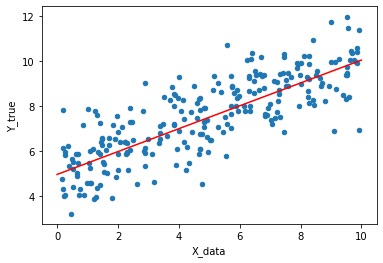

In [97]:
my_data.sample(250).plot(kind='scatter', x='X_data', y = 'Y_true')
plt.plot(new, predictions, 'r')